# 두 변수의 관계

데이터 과학의 가장 중요한 주제는 예측(prediction)이다. 데이터 과학에서는 관심 있는 반응 변수(response variable)의 값들이 설명 변수(explanatory variables, features)의 변화에 따라서 어떻게 변하는지 나타내는 관계를 추정하여 예측을 수행한다.
따라서 예측을 수행하기 위해서 여러 개 변수들의 관계를 먼저 알아보는 분석이 이루어진다. 


두 변수가 경험적 관계(empirical relation)를 보인다는 것은 주어진 데이터에서 하나의 변수의 변화를 나머지 변수의 변화를 이용하여 어느 정도 설명할 수 있다는 의미이다. 데이터를 기반으로 두 변수의 값들 사이에 함수적인 관계를  추론할 수 있는 경우 서로 경험적 관계가 있다고 말할 수 있으며 이를 이용하여 예측도 수행할 수 있다.

이때 주의해야 할 점은 경험적 관계가 나타난다고 해도 두 변수가 서로 직접 영향을 미치는 인과 관계(causal relation)가 아닌 경우도 많다. 

예를 들어 아이스크림의 판매량과 에어콘의 판매량은 유의한 통계적 관계를 보인다. 하지만 이러한 관계는 두 변수의 인과관계 때문에 나타나는 것이 아니라 제3의 변수인 기온이 두 변수에 직접적인 영향을 미쳐서 나타나는 관계이다. 이 경우 제3의 변수인 기온을 잠재변수(confounding variable)이라고 부른다.

여러 변수들의 경험적 관계에 대한 분석은 인과 관계를 구명하기 위한 연구에 중요한 기초 정보를 제공한다. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 아버지와 아들의 키


[Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) 은 영국의 학자로서 1885년에 아버지와 아들의 키에 대한 관계에 대한 연구를 데이터에 기반하여 수행하였다. Galton의 이러한 데이터에 기반한 경험적 연구는 데이터를 이용한 통계적 관계 분석의 시초로 여겨지고 있다. 

이제 1087 개로 이루어진 아버지와 아들의 키 자료를 데이터프레임 `father_son_df` 으로 저장하자. 

- `fheight`: 아버지의 키 (단위: inch)
- `sheight`: 아들의 키 (단위: inch)


In [4]:
url1 = "https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_depart/father-and-son.csv"
father_son_df = pd.read_csv(url1, sep=',', encoding = 'utf-8-sig')

In [5]:
father_son_df.head(10)

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113
5,63.02254,64.24221
6,65.37053,64.08231
7,64.72398,63.99574
8,66.06509,64.61338
9,66.96738,63.97944


In [6]:
father_son_df.shape

(1078, 2)

위의 아버지와 아들의 자료는 단위가 inch 이므로 우리 한국 사람들한테는 익숙하지 한다. 자료의 단위를 센티미터로 바꾸어 보자.

$$ \text{ 2.54 cm } = \text{ 1.0 inch} $$


In [7]:
father_son_df.fheight =  father_son_df.fheight*2.54
father_son_df.sheight =  father_son_df.sheight*2.54
father_son_df.head(10)

,fheight,sheight
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
5,160.077252,163.175213
6,166.041146,162.769067
7,164.398909,162.549180
8,167.805329,164.117985
9,170.097145,162.507778


이제 아버지의 키와 아들의 키를 산점도를 그려서 관계를 살펴보자. 

아래 산점도에서 여러분은 아버지의 키가 증가하면 아들의 키도 증가하는 **경향(trend)** 이 나타나는 현상을 볼 수 있다. 하지만 아버지의 키가 크다고 해서 아들의 키가 반드시 큰 것은 아니다. 또한  반대로 아버지의 키가 작아지면 아들의 키도 반드시 작아지는 것은 아니다.


<AxesSubplot:xlabel='fheight', ylabel='sheight'>

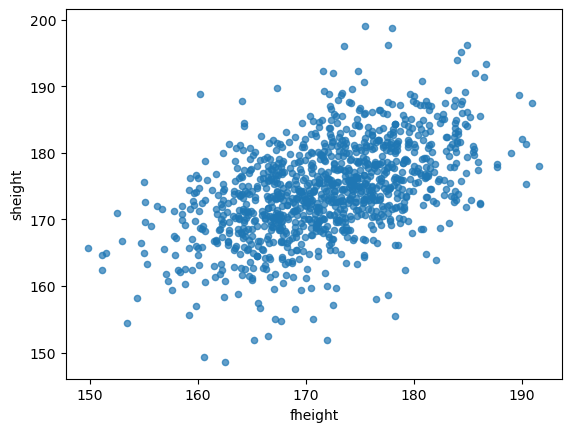

In [8]:
father_son_df.plot.scatter(x='fheight', y='sheight', alpha=0.7)

이제 아버지와 아들의 키에 대한 관계를 좀 더 시각적으로 명확하게 보기 위하여 아버지와 아들의 키에 대한 평균값을 산점도에 추가해보자.

아버지의 키가 평균보다 커도 아들의 키는 전체 아들의 평균값보다 작은 경우도 나타난다. 또한 반대로 어버지의 키가 평균보다 작아도 아들의 키가 그 평균값보다 큰 경우도 있다. 하지만 
아버지의 키와 아들의 키는 완벽하지는 않지만  전체적으로 비례적인 경향을 보이고 있다.  


In [9]:
father_son_df.describe()

,fheight,sheight
count,1078.000000,1078.000000
mean,171.925226,174.457537
std,6.971966,7.149342
min,149.880320,148.607983
25%,167.100847,170.005331
50%,172.127164,174.284183
75%,176.791569,178.983564
max,191.602182,199.046567


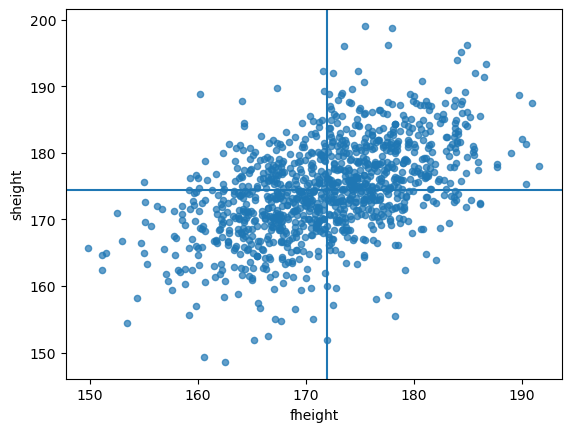

In [10]:
father_son_df.plot.scatter(x='fheight', y='sheight', alpha=0.7)
plt.axvline(x=np.mean(father_son_df.fheight)) 
plt.axhline(y=np.mean(father_son_df.sheight))

## 키와 몸무게의 관계

먼저 국민체력100에서 얻은 체력측정 데이터에서 키와 몸무게의 관계를 살펴보자.


In [11]:
url2 = "https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_depart/physical_test_2018_data.csv"
physical_data = pd.read_csv(url2, sep=',', encoding = 'utf-8-sig')

In [12]:
physical_01 = physical_data[['TEST_SEX', 'TEST_AGE', 'ITEM_F001', 'ITEM_F002']].rename(columns={'TEST_SEX': 'sex', 'TEST_AGE':'age' ,'ITEM_F001':'height', 'ITEM_F002':'weight'})
physical_01.head(5)

,sex,age,height,weight
0,M,33,159.2,57.2
1,F,48,155.8,52.9
2,M,22,175.2,96.2
3,M,29,178.7,79.4
4,F,31,160.1,50.2


먼저 19세 이상의 성인 남자의 키와 몸무게 관계를 산점도로 관계를 살펴보자.

In [13]:
physical_M = physical_01.loc[(physical_01.sex =="M") & (physical_01.age >= 19)]

<AxesSubplot:xlabel='height', ylabel='weight'>

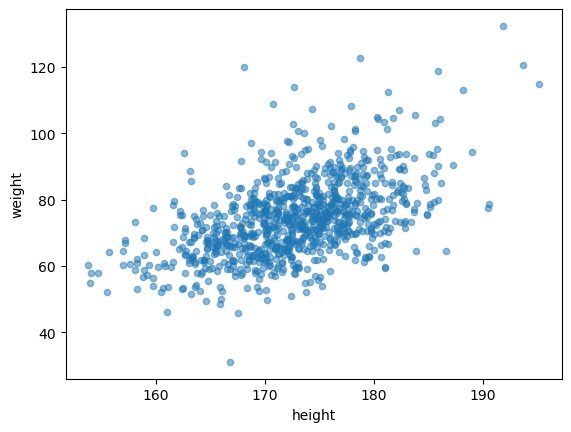

In [14]:
physical_M.plot.scatter(x='height', y='weight', alpha=0.5)

이제 19세 이상의 성인 여자의 키와 몸무게 관계를 산점도로 그리고 관계를 살펴보자.

In [15]:
physical_F = physical_01.loc[(physical_01.sex =="F") & (physical_01.age >= 19)]

<AxesSubplot:xlabel='height', ylabel='weight'>

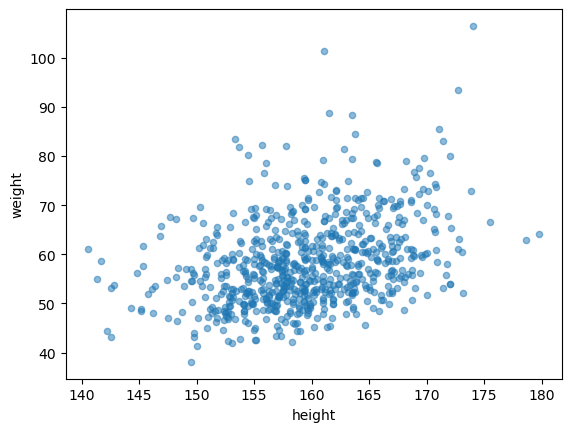

In [16]:
physical_F.plot.scatter(x='height', y='weight', alpha=0.5)

여기서 주의할 점은 위의 분석 결과가 우리 나라의 전체 남여에 대한 키와 몸무게의 일반적인 관계를 나타내는 것을 아닐 수 있다. 왜냐하면 국민체력100의 데이터는 확률표본이 아니기 때문이다. 

위에서 본 남자와 여자의 산점도는 정규분포를 따르는 경우의 산점도와 유사하다. 이는 키와 몸무게의 분포가 정규분포와 매우 유사하기 때문이다.

다음은 남자의 키와 몸무게의 분포를 히스토그램으로 나타낸 것이다.

<AxesSubplot:ylabel='Frequency'>

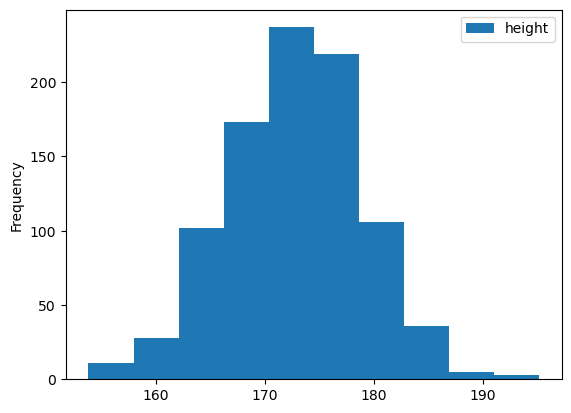

In [20]:
physical_M[['height']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

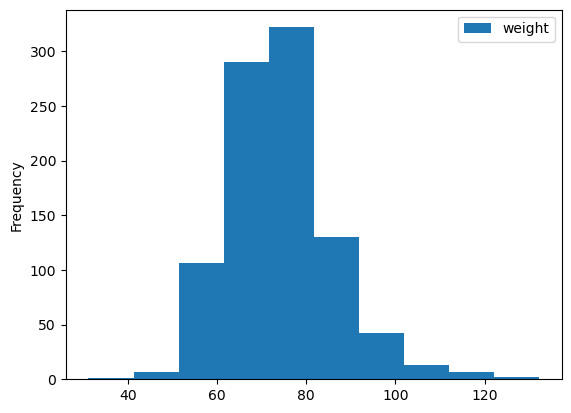

In [21]:
physical_M[['weight']].plot.hist()

다음은 여자의 키와 몸무게의 분포를 히스토그램으로 나타낸 것이다.

<AxesSubplot:ylabel='Frequency'>

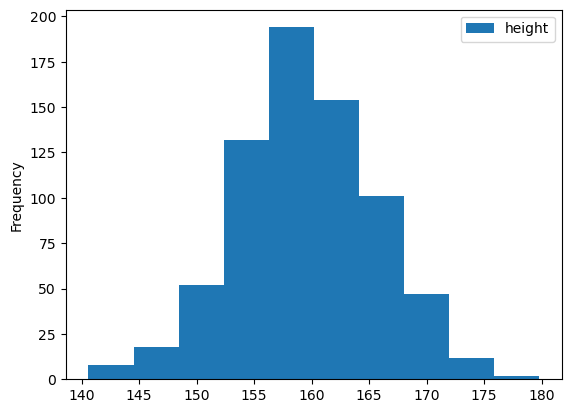

In [22]:
physical_F[['height']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

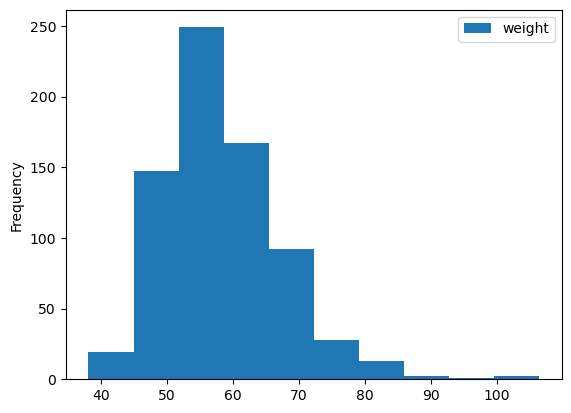

In [23]:
physical_F[['weight']].plot.hist()

## 아파트의 면적과 가격

아파트의 면적과 가격은 어떤 관계를 보일까?

[서울 열린 데이터 광장](http://data.seoul.go.kr/dataList/OA-12532/S/1/datasetView.do)에서 2019년 서울특별시 부동산 실거래가 정보를 가진 데이터 화일을 다운로드 받아보자.

2019년 거래하여 신고한 주택들의 위치와 정보 그리고 실거래 가격이 포함된 자료이다.



In [24]:
url3 = "https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_depart/seoul_apartment_2019.csv"
apart_2019_1 = pd.read_csv(url3, encoding="CP949")

/Users/ylee19067/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
apart_2019_1.head(3)

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11140-2019-4-0003930-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,84.97,0,15.0,2001,아파트,1390000000,2017.0,서울역센트럴자이
1,11140-2019-4-0003994-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,59.94,0,8.0,2001,아파트,950000000,2017.0,서울역센트럴자이
2,11140-2019-4-0004611-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,84.97,B,15.0,2001,아파트,1345000000,0.0,서울역센트럴자이


In [26]:
apart_2019_1.columns

Index(['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드',
       '업무구분', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도코드', '건물주용도',
       '물건금액', '건축년도', '건물명'],
      dtype='object')

이제 각 구별로 도수 분포표를 구해보면 2019년 1년간 거래된 주택들의 수가 알마나 되는지 알 수 있다.

In [37]:
apart_2019_1[['자치구명']].value_counts()

자치구명
송파구     8719
강서구     8229
노원구     7953
은평구     7150
성북구     6668
강동구     6651
양천구     6622
강남구     6404
구로구     5880
마포구     5597
영등포구    5147
관악구     4955
서초구     4834
동대문구    4773
서대문구    4660
동작구     4563
도봉구     4543
중랑구     4354
광진구     4337
성동구     3969
금천구     3841
강북구     3657
용산구     3399
종로구     1770
중구      1597
dtype: int64

아래 파이썬 코드는 필요한 변수를 선택하고 정리하는 코드이다.

- 자료에서 이미 지어진 아파트의 거래만 선택(분양 아파트 제외)한다.
- 거래가격의 단위는 백만원으로 변경한다.

다운로드 받은 자료 중 우리가 분석에 이용할 변수의 이름과 의미는 다음과 같다.

- `year_sale`: 신고연도, 거래가 이루어진 년도
-	`gu`: 자치구 이름
- `area` : 건물 면적(제곱미터)
-  `floor`: 층수
-  `year_built`: 건축연도, 주택이 지어진 년도
- 	`price`: 거래 가격(백만원)

In [27]:
#필요한 변수만 선택
apart_2019_2 = apart_2019_1[['신고년도', '자치구명', '건물면적',  '층정보', '건축년도','건물주용도', '물건금액']]
# 건축연도가 0 보다 큰 아파트만 선택 (선분양 아파트는 아직 건축되지 않았기 때문에 건축연도가 0이며 분석에서 제외)
apart_2019_3 = apart_2019_2.loc[ (apart_2019_2['건물주용도'] == "아파트") & (apart_2019_2['건축년도'] > 0.0)]
# 층과 연도를 정수 형식으로 변환
apart_2019_4 = apart_2019_3.astype({'층정보': 'int', '건축년도': 'int', '신고년도': 'int'})
# 거래 가격의 단위를 백만원으로 
price = apart_2019_4['물건금액']/1000000
# 거래 가격을 정수 형식으로 변환 
price = price.astype('int')
apart_2019_4['price'] = price
# 열이름을 영문으로 변환
apart_2019_5 = apart_2019_4.rename(columns={'신고년도': 'year_sale', '자치구명':'gu','건물면적':'area', '층정보':'floor', '건축년도':'year_built', '건물주용도':'type', '물건금액':'orig_price'})
# 행 인덱스의  초기화
apart_2019 = apart_2019_5[['year_sale', 'gu', 'area','floor','year_built','price']].reset_index(drop=True)

In [28]:
apart_2019.shape

(67238, 6)

In [29]:
apart_2019.head(5)

,year_sale,gu,area,floor,year_built,price
0,2019,중구,84.97,15,2017,1390
1,2019,중구,59.94,8,2017,950
2,2019,중구,59.94,18,2002,785
3,2019,중구,59.89,9,2011,990
4,2019,성동구,84.87,12,2007,1450


이제 아파트의 면적과 거래 가격의 관계를 산점도를 이용하여 살펴보자.

- 먼저 전체적으로 아파트의 면적이 증가하면  거래 가격도 증가하는 경향을 보인다. 

- 아래 산점도를 보면 아파트의 면적과 거래 가격의 관계는 앞에서 살펴본 키와 몸무게의 관계와는 매우 다른 형태를 보인다. 

- 특이한 점은 아파트의 면적이 증가하면 가격의 평균적인 추세도 증가하지만 가격의 변동(variation)도 증가한다. 이는 산점도의 모양이 가격이 증가할수록 가격의 퍼진 범위가 증가하는 것으로 일 수 있다.

이렇게 평균적인 추세와 변동성이 모두 증가하는 현상은 경제와 관련된 변수들에서 흔히 나타나는 현상이다. 


<AxesSubplot:xlabel='area', ylabel='price'>

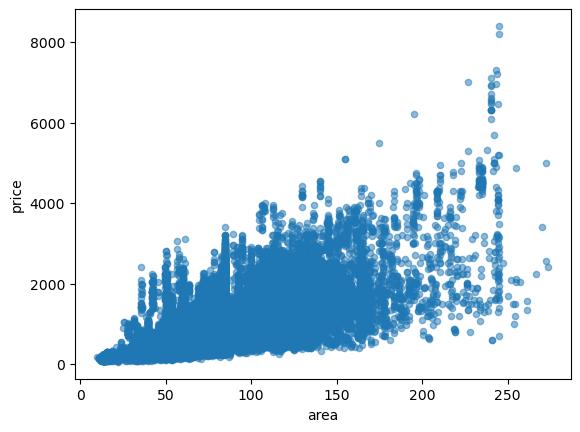

In [30]:
apart_2019.plot.scatter(x='area', y='price', alpha=0.5)

아파트의 면적과 거래 가격에 대한 히스토그램을 그려 보면 정규분포의 형태와 매우 다른 오른쪽으로 꼬리가 긴 분포를 보이고 있다.  

<AxesSubplot:ylabel='Frequency'>

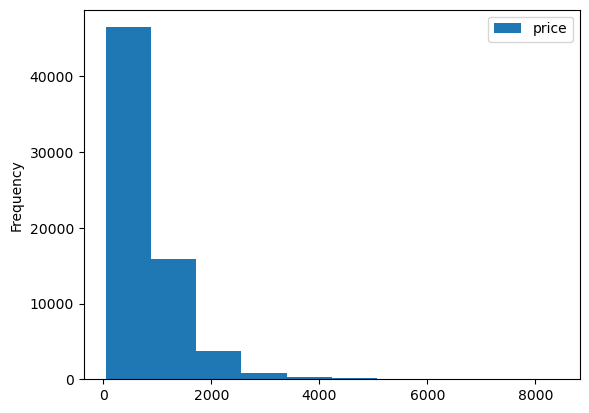

In [31]:
apart_2019[['price']].plot.hist()

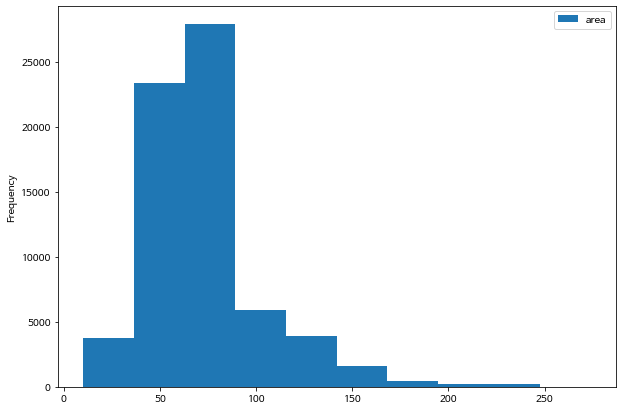

In [44]:
apart_2019[['area']].plot.hist()

이제 2019년 아파트 실거래가 자격 자료를 하나의 자치구만 선택해서 면적과 거래 가격의 관계를 살펴보자. 

In [32]:
apart_2019_gu = apart_2019.loc[apart_2019.gu == '노원구']

In [33]:
apart_2019_gu.shape

(6507, 6)

<AxesSubplot:xlabel='area', ylabel='price'>

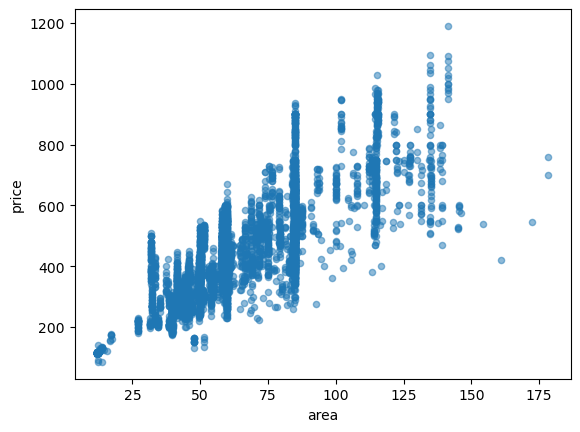

In [34]:
apart_2019_gu.plot.scatter(x='area', y='price', alpha=0.5)

##  학생의 성적

어느 대학교의 기초 통계학을 수강한 학생들의 중간고사와 기말고사의 성적이 어떤 관계를 가지는지 실제 데이터를 이용하여 살펴보자.

다음은 124명의 학생들에 대한 중간고사와 기말고사 성적이다. 



In [35]:
url4 ="https://uos-bigdata.github.io/lab_data/docs/assets/data_lab_depart/mid-final-scores.csv"
scores01 = pd.read_csv(url4, encoding="CP949", delim_whitespace=True)

In [36]:
scores01.shape

(124, 2)

In [37]:
scores01.head(5)

,mid,final
0,57,88
1,54,79
2,69,42
3,72,91
4,63,84


디음 그림을 보면 위에서 살펴본 키와 몸무게 또는  아파트 면적과 가격에서 나타나는 관계와 다른 형태이다. 

중간고사와 기말고사의 성적이 작으면 두 변수의 관계가 약해지고, 성적이 크면 관계가 강해지는 경향을 보인다. 

<AxesSubplot:xlabel='mid', ylabel='final'>

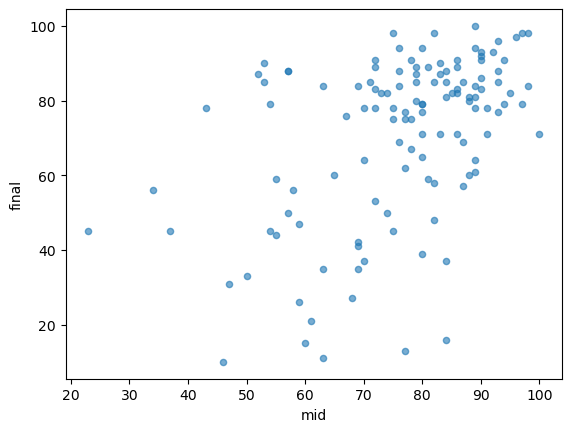

In [38]:
scores01.plot.scatter(x='mid', y='final', alpha=0.6)

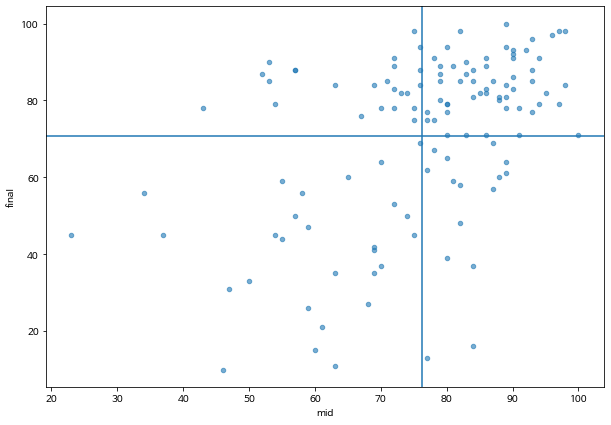

In [55]:
scores01.plot.scatter(x='mid', y='final', alpha=0.6)
plt.axvline(x=np.mean(scores01.mid)) 
plt.axhline(y=np.mean(scores01.final))